# Hydrogen atom

In [1]:
#load the required modules
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import warnings

In [2]:
#defining the trial wavefunction for the ground state of hydrogen atom
def Hyd_GS(r, alpha = 2):
    """
    This function defines the Ground state wavefunction of Hydrogen atom    
    Parameters:
    - r: The position of the electron in the hydrogen atom
    - alpha: Optimizing parameter, initiate with some value
            (By default = 2)
             
    Returns:
    
    This function returns you the value of the wavefunction for a particular position and optimizing parameter alpha
    """
    
    if not isinstance(r,(float,int)):
        raise ValueError("Value other than float or integer was called")
    if not isinstance(alpha, (float, int)):
        raise ValueError("Value other than float or integer was called")
    
    return alpha * r * np.exp(-alpha*r)

In [3]:
def Hyd_GSPDF(r, alpha = 1):
    """
    This function defines the PDF of the 
    ground state wavefunction of Hydrogen atom
    
    Parameters:
    - r: The position of the particle in the Hydrogen atom 
    - alpha: Optimizing parameter, initiate with some value
             (By default = 1)
    
    Returns:
    
    This function returns you the value of the PDF for a particular position and optimizing parameter alpha
    corresponding to the ground state of the Hydrogen atom
    """
    
    if not isinstance(r,(float,int)):
        raise ValueError("Value other than float or integer was called")
    if not isinstance(alpha, (float, int)):
        raise ValueError("Value other than float or integer was called")
    
    wave_func = Hyd_GS(r, alpha)
    return np.abs(wave_func)**2

In [4]:
#defining the local energy function
def Hyd_local(r, alpha=2):
    """
    This function defines the local energy of the 
    ground state wavefunction of Hydrogen atom.

    Parameters:
    - r: The position of the particle in the Hydrogen atom
    - alpha: Optimizing parameter, initiate with some value
             (By default = 2)

    Returns:
    - Local energy of the ground state of Quantum harmonic oscillator system at position x
    """
    
    if not isinstance(r,(float,int)):
        raise ValueError("Value other than float or integer was called")
    if not isinstance(alpha, (float, int)):
        raise ValueError("Value other than float or integer was called")
    
    return - 1/r - (alpha/2) * (alpha - (2/r))

In [5]:
def Hyd_VMC(r, step, samples = 10000,alpha=2):
    """
    This funciton performs Variational Monte Carlo sweeps
    
    Parameters:
    - r: initial position
    - step: step size
    - alpha_list: in takes a list of alpha values for optimization
    - samples: no. of VMC sweeps to be performed
               (By default: 10000)
    """
    position_saved = []
    energy_saved = []
    
    for n in range(samples):
        q = np.random.uniform(-step, step)
        r_new = r + q
        if r_new <= 0:
            continue
        
        P_old = Hyd_GSPDF(r, alpha)
        P_new = Hyd_GSPDF(r_new, alpha)
        ratio = P_new/(P_old + 1e-10)
        
        s = np.random.rand()
        
        if ratio > s:
            r = r_new  
        
        position_saved.append(r)
        energy_saved.append(Hyd_local(r, alpha))
    
    return position_saved, energy_saved

In [6]:
#defining a function to optimize alpha
def Hyd_alpha_opt(alpha_list, r, step, samples=10000):
    """
    This function will optimize the value of alpha for the wavefunction
    
    Parameters:
    - alpha_list: takes in a list of alpha for optimization
    - r: give an initial value of the position for the particle
    - step: give a step size for movement
    - samples: enter the number of VMC sweeps you would like to perform
               (By default: 10000)
    """
    saved_energies = []
    variance = []
    mean_energies = []
    for a in tqdm(alpha_list, unit='alpha', desc='Optimizing alpha'):
        positions, energies = Hyd_VMC(r, step, samples, a) #energies gives a list of energy values for a particular round, so you need to mean it up
        saved_energies.append(np.mean(energies))
        variance.append(np.var(energies))
        mean_energies.append(np.mean(energies))
        
    optimal_alpha = alpha_list[np.argmin(saved_energies)]
    
    return saved_energies, optimal_alpha, variance, mean_energies

In [7]:
a = np.linspace(0.2,1.6,15)
energies, optimal_alpha, variance, mean_energies = Hyd_alpha_opt(a, 0.5, 25,100000)

Optimizing alpha: 100%|██████████| 15/15 [00:15<00:00,  1.01s/alpha]


In [8]:
z = a**2/2 - a

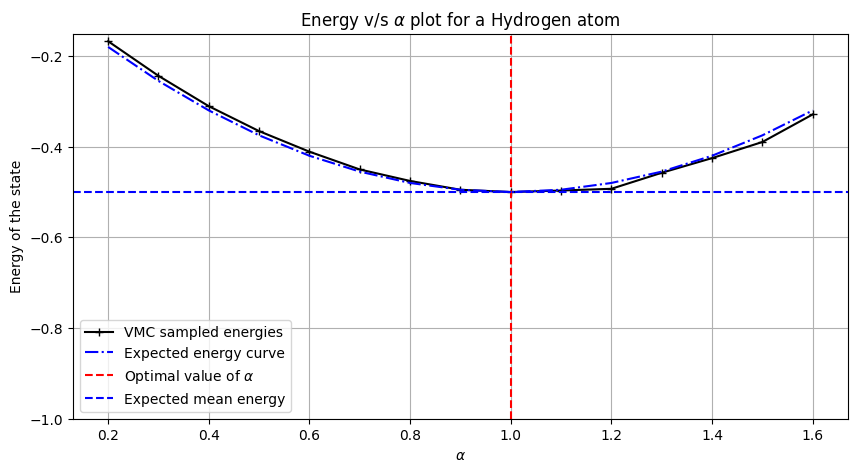

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(a, energies, 'k', linestyle='-', marker='+', label='VMC sampled energies')
plt.plot(a, z, linestyle='-.', color='b', label='Expected energy curve')
plt.axvline(optimal_alpha, color='r', linestyle='--', label=r'Optimal value of $\alpha$')
plt.axhline(-0.5, color='b', linestyle='--', label='Expected mean energy')

plt.yticks(np.arange(-1, 0, 0.2))  # Adjust range if needed

plt.grid()
plt.xlabel(r"$\alpha$")
plt.ylabel(r"Energy of the state")
plt.title(r"Energy v/s $\alpha$ plot for a Hydrogen atom")
plt.legend()

plt.show()

In [10]:
from IPython.display import display, Math

display(Math(r"\alpha \quad \quad \quad \quad \langle H \rangle \quad \quad \quad \quad \quad \quad  \sigma^2"))

for i in range(len(a)):
    print(f"{round(a[i], 4)}\t{round(mean_energies[i], 4)}\t \t{round(variance[i], 4)}")

<IPython.core.display.Math object>

0.2	-0.1675	 	0.0218
0.3	-0.2437	 	0.0357
0.4	-0.3107	 	0.0697
0.5	-0.3657	 	0.0681
0.6	-0.411	 	0.0465
0.7	-0.4502	 	0.0497
0.8	-0.4756	 	0.0232
0.9	-0.495	 	0.0075
1.0	-0.5	 	0.0
1.1	-0.4967	 	0.0118
1.2	-0.4929	 	0.0379
1.3	-0.4576	 	0.2081
1.4	-0.4252	 	0.2339
1.5	-0.3897	 	0.5379
1.6	-0.3288	 	0.9611


In [11]:
#using optimized alpha to recover the PDF of the system
pos, ene = Hyd_VMC(r=0.5, step=10, samples=1000000, alpha=optimal_alpha)

C:\Users\profs\AppData\Local\Temp\ipykernel_5996\1334356047.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi_sq_analytic /= np.trapz(psi_sq_analytic, r_vals) #Normalized PDF


Text(0.5, 1.0, 'Comparison of VMC Sampling and Analytic Solution')

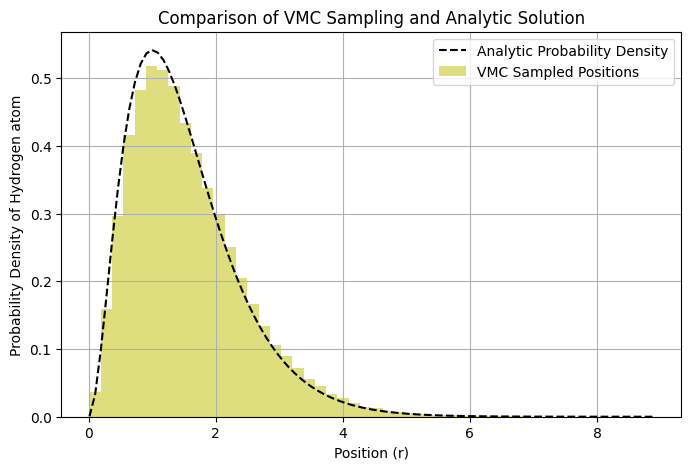

In [12]:
pos = np.array(pos) 
r_vals = np.linspace(min(pos), max(pos), 100)
psi_analytic = optimal_alpha * r_vals * np.exp(-optimal_alpha*r_vals)
#Normalization of the analytic wavefunction
psi_sq_analytic = psi_analytic**2 #Un-normalized PDF
psi_sq_analytic /= np.trapz(psi_sq_analytic, r_vals) #Normalized PDF


plt.figure(figsize=(8,5))
plt.plot(r_vals, psi_sq_analytic, label="Analytic Probability Density", linestyle="--", color='k')


plt.hist(pos, bins=50, color='y', density=True, alpha=0.5, label="VMC Sampled Positions")

plt.xlabel("Position (r)")
plt.ylabel("Probability Density of Hydrogen atom")
plt.legend()
plt.grid()
plt.title("Comparison of VMC Sampling and Analytic Solution")

The mean energy of the particle in the ground state of Quantum harmonic oscillator is: -0.5


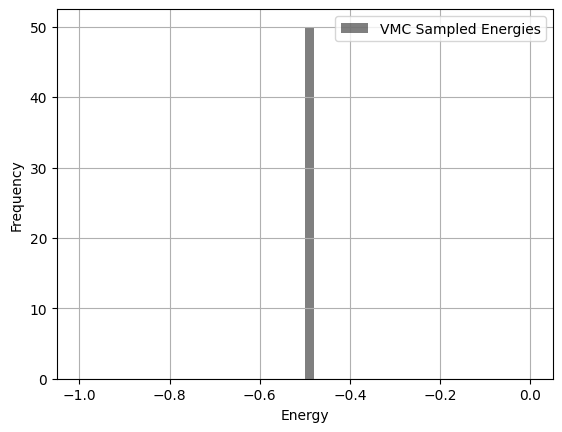

In [13]:
plt.hist(ene, bins=50, density=True, alpha=0.5, color='k', label="VMC Sampled Energies")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
print("The mean energy of the particle in the ground state of Quantum harmonic oscillator is:", np.mean(ene))